---

<h1><center>SDSE Homework 3 <br><br> Problem 2: Principal Components Analysis </center></h1>

---

In this problem we will use principal components analysis to reduce the number of columns in a data matrix. 

In [2]:
result = {
    'SID': 3038661550 # enter your SID
}

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

The data consists of N=100 samples of a D=16-dimensional random variable. The samples are iid. Our task is to find a linear combination of the variables that captures most of the variance of the distribution. The next cell loads the data and extracts its dimensions. 

In [4]:
with open('data_synthetic.pickle','rb') as file:
    X = pickle.load(file)
    
N = X.shape[0]
D = X.shape[1]

# Seaborn pairplot

Seaborn is a plotting package similar to matplotlib. We won't use it much, but it is pretty popular. One nice thing is its `pairplot` function, which is a visualization of the sample covariance matrix. The plot is a 16x16 grid of subplots, in this case because D=16. Below we see the upper-left 4x4 block. The diagonals are histograms of each of the 16 variables. The off-diagonals are scatter plots of the respective column pairs. Here we can see, for example, that:
+ x0 and x1 are negatively correlated
+ x0 and x2 are uncorrelated
+ x1 and x3 are positevely correlated 

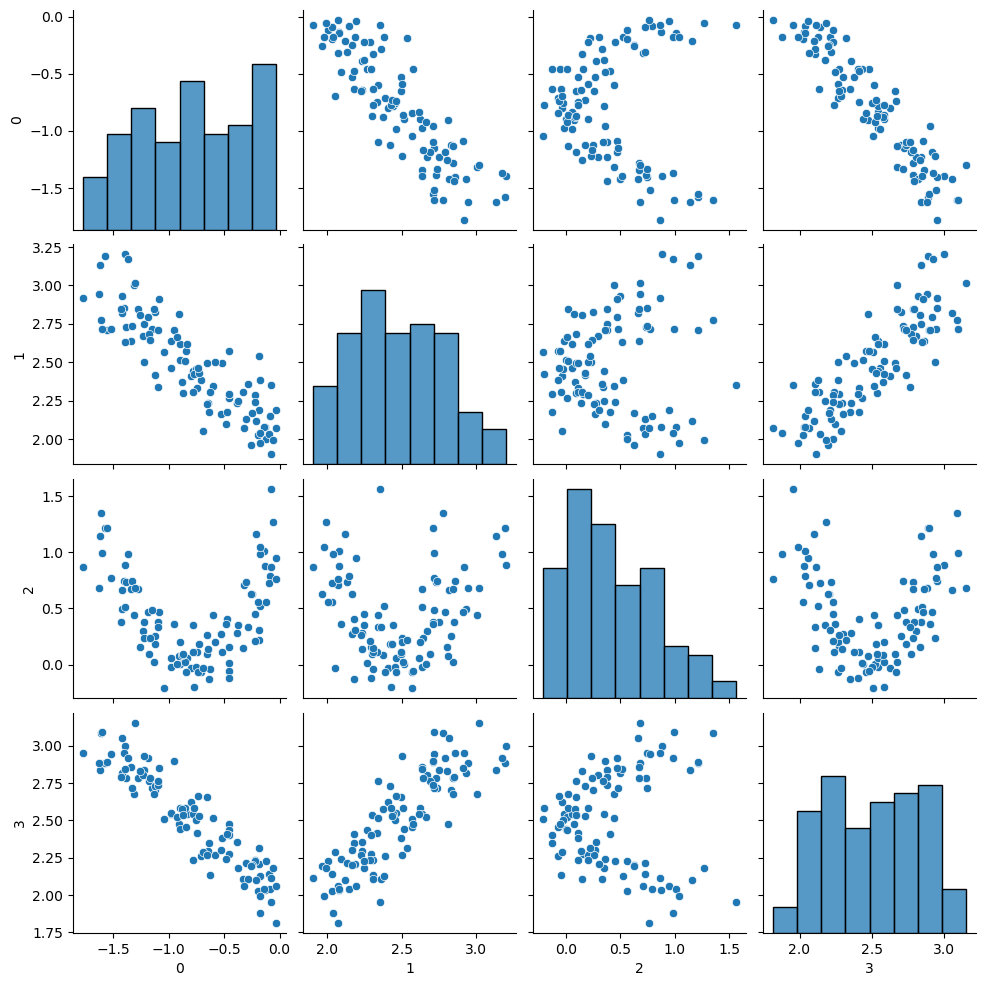

In [5]:
Xdf = pd.DataFrame(X)
sns.pairplot(Xdf.iloc[:,:4])

# Sample correlation matrix
`np.corrcoef` computes the sample correlation matrix for a matrix. Use it to compute the 16x16 sample correlation matrix for `X`, and then use `plt.imshow` to visualize the upper-left 4x4 corner (corresponding to the seaborn plot above). Notice how the colors relate to the correlations we noted in the previous part. (0 pts)

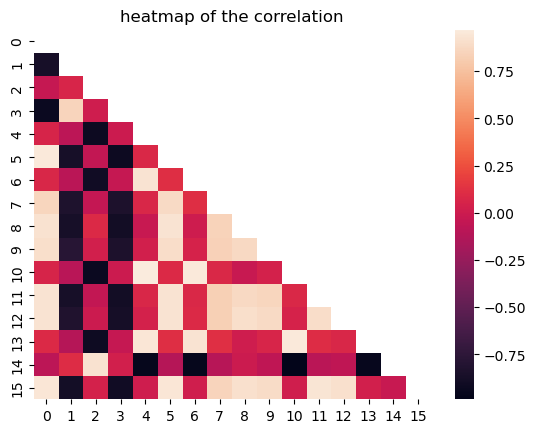

In [69]:
cov = np.corrcoef(X.T) # 16x16
mask = np.triu(np.ones_like(cov, dtype=bool))
sns.heatmap(cov, mask=mask)
plt.title("heatmap of the correlation")
plt.show()

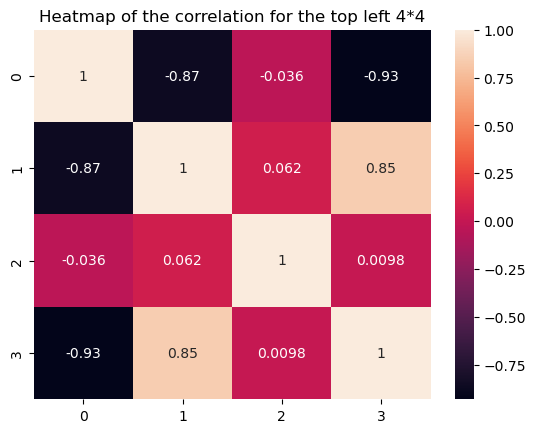

In [67]:
cov = np.corrcoef(X.T)[:4,:4] # 4x4
sns.heatmap(cov,annot=True )
plt.title("Heatmap of the correlation for the top left 4*4")
plt.show()

# 1. Center and normalize the data
Subtract the mean of each column from `X`. Divide the result by the standard deviation of each column, and record this new matrix to `Xc`.

In [39]:
Xc = (X-X.mean())/X.std()# Add your code here

In [40]:
################################
# Reporting. Do not modify.#####
result['Xc'] = Xc    # 2 points
################################

# 2. Run SVD on Xc
This has been done for you in the next cell.

In [43]:
U, s, Vt = np.linalg.svd(Xc)

100 16 16


# 3. Plot the singular values in order
Use `plt.plot` (a semilogy plot is not needed in this case)

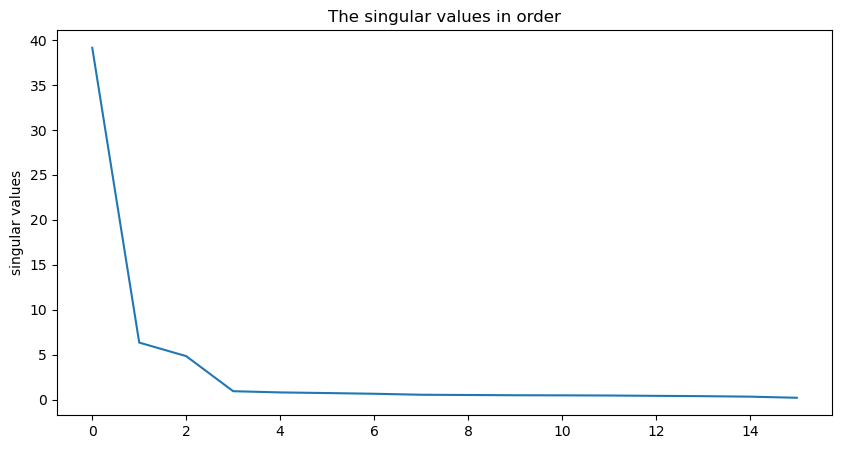

In [66]:
fig3 = plt.figure(figsize=(10,5))
plt.plot(s)
plt.ylabel("singular values")
plt.title("The singular values in order")
plt.show()

In [ ]:
################################
# Reporting. Do not modify.#####
result['fig3'] = fig3    # 4 points
################################

    # 4. Plot the total variance explained as a function of the number of dimensions.
The total variation explained by the rank $\rho$ approximation of `Xc` is the sum of the squares of the first $\rho$ singular values, divided by N. 

$$ \frac{1}{N}\sum_{i=1}^{\rho} \sigma_i^2 $$

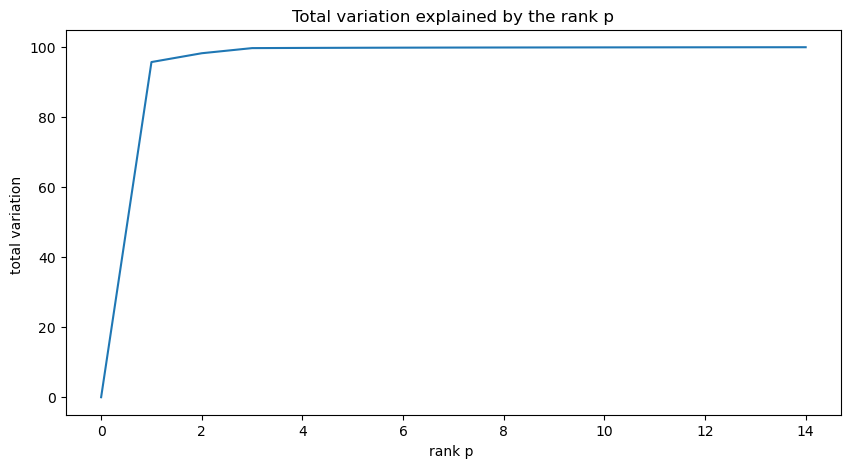

In [65]:
fig4 = plt.figure(figsize=(10,5))
res = []
for p in range(len(s)-1):
    sum = 0
    for i in range(p):
        sum += (s[i]**2)/len(s)
    res.append(sum)
plt.plot(res)
plt.xlabel("rank p ")
plt.ylabel("total variation ")
plt.title("Total variation explained by the rank p")
plt.show()

# Add your code here

In [62]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4   # 4 points
################################

# 5. Compute Ur, sr, and Vtr for r=2. 
Save these to `Ur`, `sr`, and `Vtr`

In [82]:
r = 2
Ur = np.matrix(U[:,:r])  # Add your code here
sr = np.diag(s[:r])  # Add your code here
Vtr = np.matrix(Vt[:r,:])  # Add your code here

In [80]:
################################
# Reporting. Do not modify.#####
result['Ur'] = Ur      # 2 points
result['sr'] = sr      # 1 points
result['Vtr'] = Vtr    # 2 points
################################

# 6. Compute the optimal two-column representation of X
Save it to Xr

In [83]:
Xr = Ur*sr*Vtr  # Add your code here

In [84]:
################################
# Reporting. Do not modify.#####
result['Xr'] = Xr   # 4 points
################################

---
## Do not modify below this

In [85]:
with open('hw3_prob2_{}.pickle'.format(result['SID']),'wb') as file:
    pickle.dump(result,file)